## MCP for Finance - Stock Researcher Agent

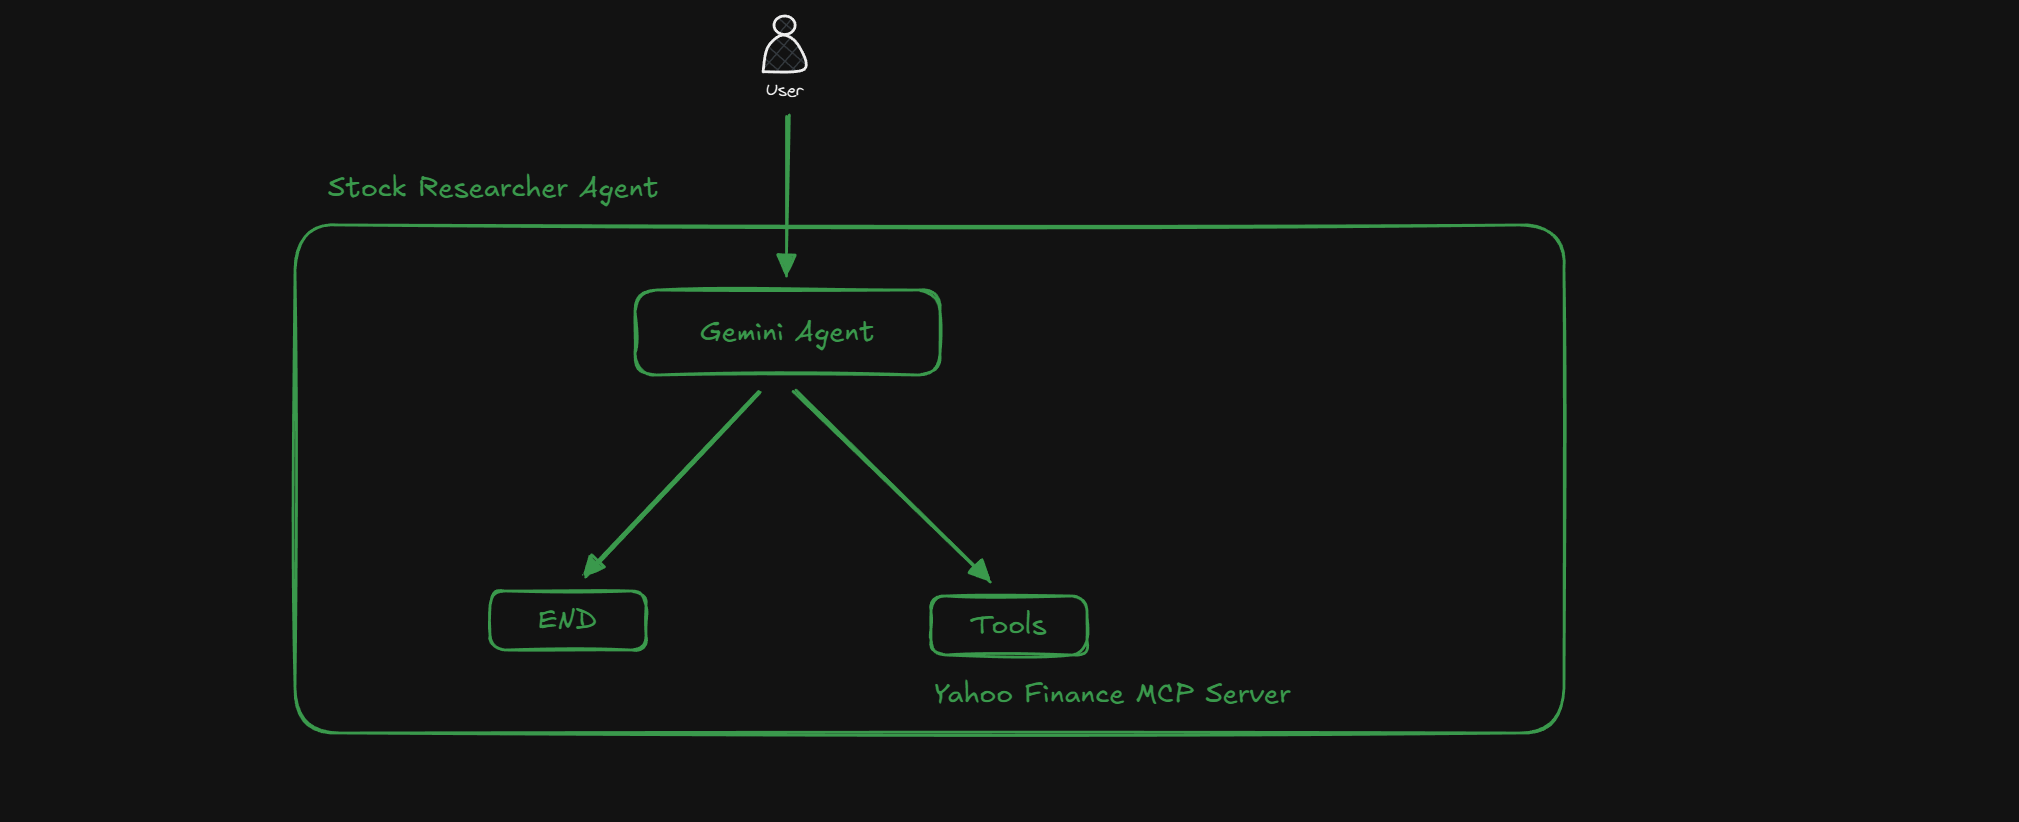

### Yahoo Finance Research Tool

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from dotenv import load_dotenv
load_dotenv()

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent, AgentState
from langchain_core.messages import HumanMessage, ToolMessage

from langchain_core.tools import tool, InjectedToolCallId
from langgraph.prebuilt import InjectedState
from langgraph.types import Command

from typing import Annotated, NotRequired

import subprocess
import sys

In [ ]:
@tool
def finance_research(query):
    """Research stocks using Yahoo Finance MCP async function."""

    code = f"""
import asyncio
from yahoo_mcp import finance_research
asyncio.run(finance_research("{query}"))
"""
    
    result = subprocess.run([sys.executable, '-c', code], capture_output=True, text=True)

    return result.stdout

In [ ]:
query = "What is the current stock price of Apple (AAPL)?"
response = finance_research.invoke({"query": query})

print(response)

### Stock Researcher Agent